In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
import re
from datetime import datetime
import sys
import csv
import seaborn as sns
from collections import Counter
from IPython.display import Image

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0] 

last run on 2018-06-05 16:08:26.999945


In [2]:
%qtconsole

In [3]:
# define directories
baseDir = os.getcwd()
dataDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/'
figDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Figs/'

In [4]:
# read in data
spray2 = pd.read_csv(os.path.join(dataDir, "Q_secondspray.csv"), header = None)
forceAngle2 = pd.read_csv(os.path.join(dataDir, "ValSp3_secondspray.csv"), header = None)
spray2.shape

spray1 = pd.read_csv(os.path.join(dataDir, "Q_firstspray.csv"), header = None)
forceAngle1 = pd.read_csv(os.path.join(dataDir, "ValSp3_firstspray.csv"), header = None)

spray = pd.concat((spray1, spray2), axis=1, ignore_index = True)
forceAngle = pd.concat((forceAngle1, forceAngle2), axis=1, ignore_index=True)
spray.shape

FileNotFoundError: File b'/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/Q_secondspray.csv' does not exist

In [73]:
spray.head()

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.000000,0.000000,0.78540,3.927,0.0001,0.00010,0.000000,0.000000,0.000000,0.000000,...,0.18096,2.6958,0.34997,2.4985,0.78586,3.9530,35.052,249.73,0.18096,2.6958
1,0.000103,0.000041,0.78541,3.927,1.0038,0.42265,0.048971,0.000594,-0.000117,0.000197,...,2.42650,2.5106,0.35770,2.5485,0.78626,3.9536,40.747,246.03,2.45890,2.4867
2,0.000405,0.000172,0.78542,3.927,1.9839,0.86875,0.057278,0.003731,-0.000463,0.000785,...,2.40100,2.4679,0.36637,2.5980,0.78676,3.9540,45.105,243.67,2.42740,2.4223
3,0.000906,0.000393,0.78543,3.927,2.9636,1.31530,0.064795,0.006861,-0.001037,0.001760,...,2.34940,2.4276,0.37593,2.6470,0.78724,3.9545,49.448,241.32,2.36830,2.3605
4,0.001603,0.000703,0.78544,3.927,3.9431,1.76200,0.072037,0.009950,-0.001839,0.003123,...,2.28630,2.3888,0.38635,2.6955,0.78771,3.9550,53.786,238.99,2.29890,2.3002


In [74]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

spray.rename(columns=dict(zip(spray.columns[[np.arange(8)]], new_cols)), inplace=True)


In [75]:
spray.head(10)

,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.000000,0.000000,0.78540,3.927,0.0001,0.00010,0.000000,0.000000,0.000000,0.000000,...,0.18096,2.6958,0.34997,2.4985,0.78586,3.9530,35.052,249.73,0.18096,2.6958
1,0.000103,0.000041,0.78541,3.927,1.0038,0.42265,0.048971,0.000594,-0.000117,0.000197,...,2.42650,2.5106,0.35770,2.5485,0.78626,3.9536,40.747,246.03,2.45890,2.4867
2,0.000405,0.000172,0.78542,3.927,1.9839,0.86875,0.057278,0.003731,-0.000463,0.000785,...,2.40100,2.4679,0.36637,2.5980,0.78676,3.9540,45.105,243.67,2.42740,2.4223
3,0.000906,0.000393,0.78543,3.927,2.9636,1.31530,0.064795,0.006861,-0.001037,0.001760,...,2.34940,2.4276,0.37593,2.6470,0.78724,3.9545,49.448,241.32,2.36830,2.3605
4,0.001603,0.000703,0.78544,3.927,3.9431,1.76200,0.072037,0.009950,-0.001839,0.003123,...,2.28630,2.3888,0.38635,2.6955,0.78771,3.9550,53.786,238.99,2.29890,2.3002
5,0.002498,0.001104,0.78546,3.927,4.9229,2.20850,0.079734,0.012952,-0.002868,0.004875,...,2.23600,2.3500,0.39766,2.7435,0.78817,3.9555,58.132,236.64,2.24280,2.2398
6,0.003592,0.001596,0.78547,3.927,5.9026,2.65510,0.087317,0.015904,-0.004127,0.007016,...,2.19100,2.3117,0.40984,2.7911,0.78862,3.9559,62.482,234.30,2.19070,2.1800
7,0.004884,0.002178,0.78549,3.927,6.8824,3.10160,0.094950,0.018795,-0.005615,0.009546,...,2.13260,2.2749,0.42290,2.8382,0.78905,3.9563,66.823,231.97,2.12360,2.1218
8,0.006372,0.002849,0.78551,3.927,7.8616,3.54860,0.101760,0.021684,-0.007332,0.012467,...,2.06830,2.2393,0.43684,2.8848,0.78948,3.9568,71.165,229.64,2.05570,2.0645
9,0.008059,0.003611,0.78553,3.927,8.8413,3.99520,0.109310,0.024470,-0.009276,0.015774,...,2.02650,2.2030,0.45166,2.9310,0.78989,3.9572,75.519,227.30,2.00650,2.0068


In [76]:
spray.tail()

,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
95,0.89221,0.40826,0.79185,3.9286,92.852,42.697,0.56987,0.10716,-1.0494,1.7516,...,-1.3433,0.39711,5.0213,5.1530,0.78774,3.9580,450.32,28.387,-2.2276,-1.7798
96,0.91107,0.41694,0.79197,3.9286,93.823,43.154,0.56918,0.10693,-1.0720,1.7886,...,-1.3828,0.38008,5.1127,5.1585,0.78728,3.9577,454.65,26.050,-2.2896,-1.8297
97,0.93012,0.42570,0.79208,3.9286,94.796,43.608,0.57348,0.10635,-1.0948,1.8259,...,-1.4200,0.36275,5.2050,5.1635,0.78682,3.9573,458.98,23.715,-2.3577,-1.8800
98,0.94937,0.43456,0.79220,3.9286,95.771,44.061,0.57959,0.10563,-1.1178,1.8636,...,-1.4563,0.34520,5.2981,5.1680,0.78634,3.9569,463.31,21.371,-2.4129,-1.9322
99,0.96882,0.44350,0.79232,3.9286,96.742,44.518,0.57936,0.10528,-1.1411,1.9017,...,-1.4978,0.32784,5.3922,5.1721,0.78584,3.9565,467.64,19.027,-2.4740,-1.9850


In [77]:
# add timestamp
spray['time'] = np.arange(0, 0.02, 2.0002e-04)
cols = spray.columns.tolist()
spray = spray[[cols[-1]] + cols[:-1]] 

In [78]:
spray.iloc[:, 0:9].head()

,time,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.0000,0.000000,0.000000,0.78540,3.927,0.0001,0.00010,0.000000,0.000000
1,0.0002,0.000103,0.000041,0.78541,3.927,1.0038,0.42265,0.048971,0.000594
2,0.0004,0.000405,0.000172,0.78542,3.927,1.9839,0.86875,0.057278,0.003731
3,0.0006,0.000906,0.000393,0.78543,3.927,2.9636,1.31530,0.064795,0.006861
4,0.0008,0.001603,0.000703,0.78544,3.927,3.9431,1.76200,0.072037,0.009950


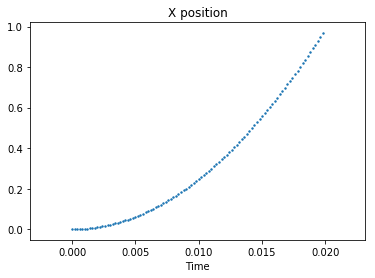

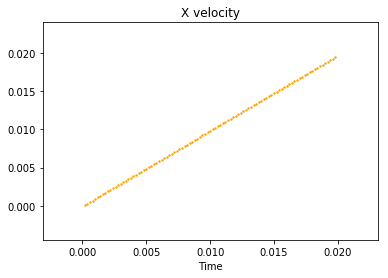

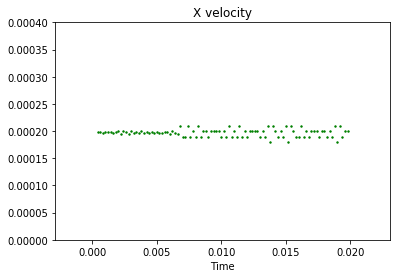

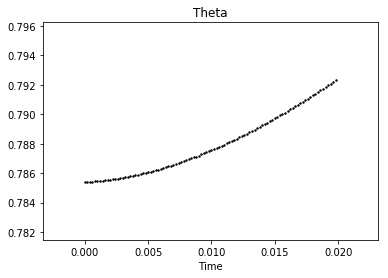

In [79]:
plt.scatter(y = spray.x, x = spray["time"], s = 2)
plt.title("X position")
plt.xlabel("Time")
plt.show()
plt.scatter(y = np.diff(spray.x), x = spray.loc[1:, "time"], s = 2, c= "orange")
plt.title("X velocity")
plt.xlabel("Time")
plt.show()

plt.scatter(y = np.diff(np.diff(spray.x)), x = spray.loc[2:, "time"], s = 2, c= "green")
plt.title("X velocity")
plt.xlabel("Time")
plt.ylim(0, 0.0004)
plt.show()

plt.scatter(y = spray.theta, x = spray.loc[:, "time"], s = 2, c= "black")
plt.title("Theta")
plt.xlabel("Time")

plt.show()

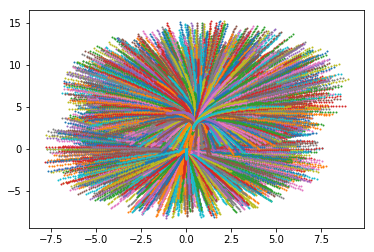

In [80]:
xx =1
yy = 2


while(xx < spray.shape[1]):
    plt.scatter(spray.iloc[:, xx], spray.iloc[:,yy], s = 1)
    xx +=8
    yy += 8

In [ ]:
# plot thetas
xx = 3
while(xx < spray.shape[1]):
    plt.scatter(y = spray.iloc[:, xx], x = spray.loc[:,"time"], s = 1)
    xx +=8

In [81]:
# make a dataset
# Take 1st row (initial state), final row (goal), and get F, alpha, tao for each
spray.iloc[[0, 99], 1:9]

,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.00000,0.0000,0.78540,3.9270,0.0001,0.0001,0.00000,0.00000
99,0.96882,0.4435,0.79232,3.9286,96.7420,44.5180,0.57936,0.10528


In [82]:
# numpy way
sparray = np.array(spray)
ii = 1
sparray[0, ii:ii+8]

array([  0.00000000e+00,   0.00000000e+00,   7.85400000e-01,
         3.92700000e+00,   1.00000000e-04,   1.00000000e-04,
         0.00000000e+00,   0.00000000e+00])

In [83]:
fa = forceAngle.transpose()
fa.columns = np.concatenate((new_cols, ["F", "alpha", "tao", "cost"]))
print(fa.shape)
fa.head()

(5000, 12)


,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot,F,alpha,tao,cost
0,0.96882,0.44350,0.79232,3.9286,96.742,44.518,0.57936,0.10528,6381.8,6.0842,13183.0,4.179500e+08
1,-1.14110,1.90170,0.82930,3.9425,-115.910,189.560,3.78200,0.97056,13312.0,1.2796,88270.0,7.807600e+07
2,-0.22157,0.47326,0.79274,3.9384,-22.268,47.327,0.66854,1.09090,3897.3,1.1061,-12274.0,3.973000e+08
3,-2.41960,6.00590,0.83930,3.9770,-248.120,598.450,4.32990,3.87880,36815.0,1.1494,28313.0,1.361700e+09
4,-1.96970,-0.33123,0.78896,3.9475,-196.920,-33.251,0.37852,2.05510,10861.0,2.4246,-48780.0,8.197200e+08


In [121]:
# make Fx and Fy
fa["Fx"] = fa.F * np.cos(fa.alpha)
fa["Fy"] = fa.F * np.sin(fa.alpha)

In [122]:
for ii in np.arange(1, spray.shape[1], step = 8):

    tmparr = np.hstack((sparray[0, ii:ii+8], sparray[99, ii:ii+8]))

    if ii == 1:
        newArr = tmparr
    else: 
        newArr = np.vstack((newArr, tmparr))

In [123]:
newDF = pd.DataFrame(newArr)
newDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,0.96882,0.44350,0.79232,3.9286,96.742,44.518,0.57936,0.10528
1,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-1.14110,1.90170,0.82930,3.9425,-115.910,189.560,3.78200,0.97056
2,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-0.22157,0.47326,0.79274,3.9384,-22.268,47.327,0.66854,1.09090
3,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-2.41960,6.00590,0.83930,3.9770,-248.120,598.450,4.32990,3.87880
4,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-1.96970,-0.33123,0.78896,3.9475,-196.920,-33.251,0.37852,2.05510


In [124]:
newDF.columns = np.concatenate(([ii + "_i" for ii in new_cols], [ii + "" for ii in new_cols]))

In [125]:
print(newDF.shape)
newDF.head()

(5000, 16)


,x_i,y_i,theta_i,phi_i,x_dot_i,y_dot_i,theta_dot_i,phi_dot_i,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,0.96882,0.44350,0.79232,3.9286,96.742,44.518,0.57936,0.10528
1,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-1.14110,1.90170,0.82930,3.9425,-115.910,189.560,3.78200,0.97056
2,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-0.22157,0.47326,0.79274,3.9384,-22.268,47.327,0.66854,1.09090
3,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-2.41960,6.00590,0.83930,3.9770,-248.120,598.450,4.32990,3.87880
4,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-1.96970,-0.33123,0.78896,3.9475,-196.920,-33.251,0.37852,2.05510


In [130]:
# drop NA's
X = np.array(newDF.dropna())
Y = np.array(fa.dropna())

# check
print(all(X[:,9] == Y[:,1]))
print(len(X))

Y = Y[:, [10, 12, 13]]
Y.shape

True
4892


(4892, 3)

In [131]:
Y[0:10, ]

array([[ 13183.        ,   6255.87216287,  -1261.52079722],
       [ 88270.        ,   3821.853808  ,  12751.57941081],
       [-12274.        ,   1746.5802607 ,   3484.0213379 ],
       [ 28313.        ,  15058.62447069,  33594.37533354],
       [-48780.        ,  -8186.8624101 ,   7136.98850202],
       [ 38695.        ,  31153.69619049,   5616.89858111],
       [ 42761.        ,  32439.91465515, -13118.38409129],
       [ 27232.        ,   6462.77558465,  41717.36756727],
       [ 35097.        ,  26103.19077857,  -4800.84494415],
       [ 68883.        , -16984.40328282,  17955.7985377 ]])

In [132]:
combDF = pd.merge(newDF.dropna(), fa.dropna(), left_on = new_cols, right_on = new_cols, how = "inner")
print(combDF.shape)
combDF.head()

(4892, 22)


,x_i,y_i,theta_i,phi_i,x_dot_i,y_dot_i,theta_dot_i,phi_dot_i,x,y,...,x_dot,y_dot,theta_dot,phi_dot,F,alpha,tao,cost,Fx,Fy
0,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,0.96882,0.44350,...,96.742,44.518,0.57936,0.10528,6381.8,6.0842,13183.0,4.179500e+08,6255.872163,-1261.520797
1,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-1.14110,1.90170,...,-115.910,189.560,3.78200,0.97056,13312.0,1.2796,88270.0,7.807600e+07,3821.853808,12751.579411
2,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-0.22157,0.47326,...,-22.268,47.327,0.66854,1.09090,3897.3,1.1061,-12274.0,3.973000e+08,1746.580261,3484.021338
3,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-2.41960,6.00590,...,-248.120,598.450,4.32990,3.87880,36815.0,1.1494,28313.0,1.361700e+09,15058.624471,33594.375334
4,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,-1.96970,-0.33123,...,-196.920,-33.251,0.37852,2.05510,10861.0,2.4246,-48780.0,8.197200e+08,-8186.862410,7136.988502


In [133]:
# split into test and training set
from sklearn.model_selection import train_test_split

In [134]:
import tensorflow as tf

In [135]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

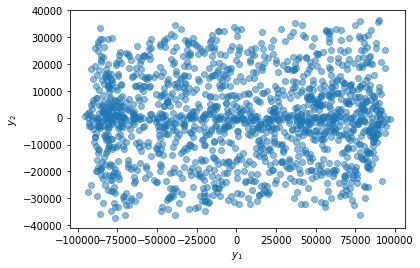

In [144]:
from sklearn.ensemble import RandomForestRegressor

clf1 = RandomForestRegressor(1000, n_jobs = 4).fit(Xtrain, Ytrain)
Ypred1 = clf1.predict(Xtest)

fig, ax = plt.subplots()
ax.plot(Ypred1[:, 0], Ypred1[:, 1], 'o', alpha=0.5)
ax.set_xlabel('$y_1$'); ax.set_ylabel('$y_2$');

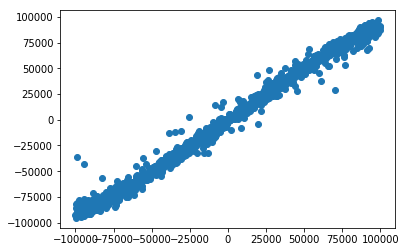

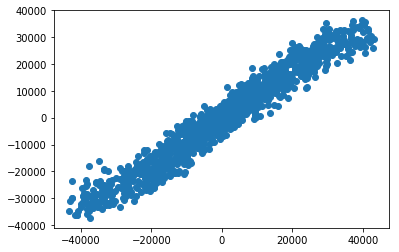

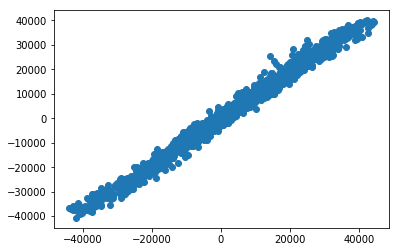

In [145]:
for ii in range(3):
    plt.scatter(Ytest[:,ii],Ypred1[:,ii] )
    plt.show()

In [146]:
class MultiOutputRF(object):
    
    '''From here: http://astrohackweek.org/blog/multi-output-random-forests.html'''
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, Y):
        X, Y = map(np.atleast_2d, (X, Y))
        assert X.shape[0] == Y.shape[0]
        Ny = Y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            clf = RandomForestRegressor(*self.args, **self.kwargs)
            Xi = np.hstack([X, Y[:, :i]])
            yi = Y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        Y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            Y[:, i] = clf.predict(np.hstack([X, Y[:, :i]]))
        return Y

In [147]:
clf2 = MultiOutputRF(1000, n_jobs = 4).fit(Xtrain, Ytrain)
Ypred2 = clf2.predict(Xtest)

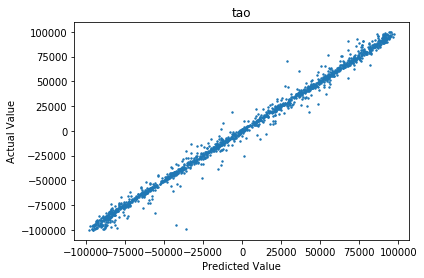

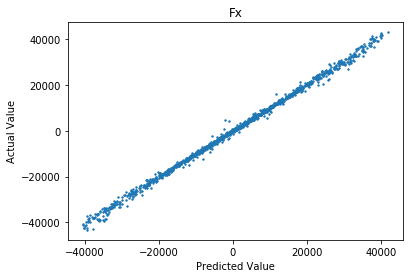

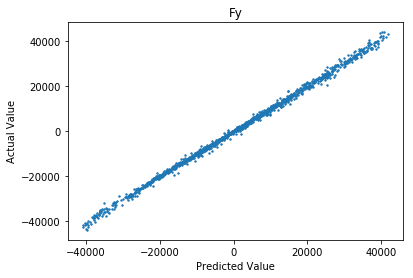

In [149]:
# note: might want to break down into Fx and Fy, b/c radians don't work well with MSE

nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = Ypred2[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [157]:
# this works surprisingly well

from sklearn.multioutput import MultiOutputRegressor

mor = MultiOutputRegressor(RandomForestRegressor(1000, n_jobs = 4)).fit(X, Y)

In [158]:
mpreds = mor.predict(Xtest)

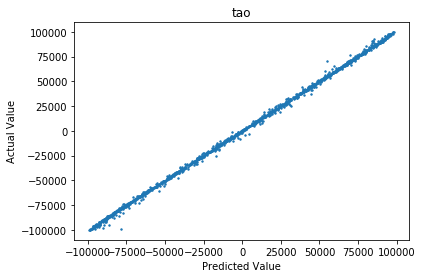

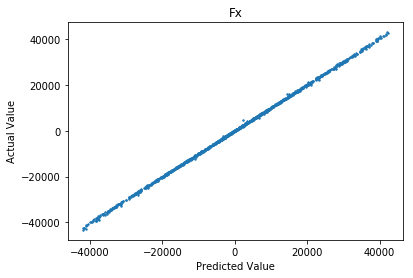

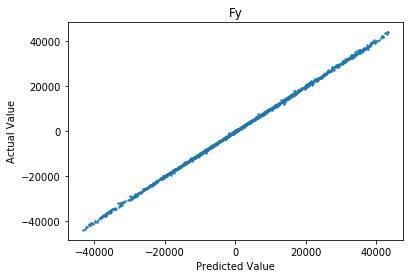

In [159]:
nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = mpreds[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

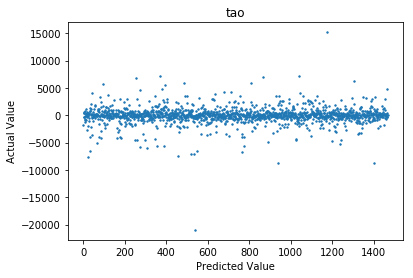

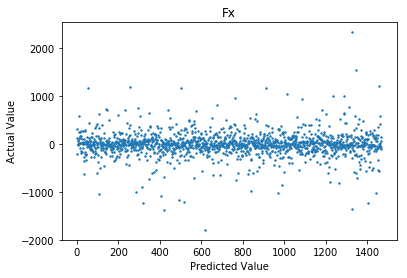

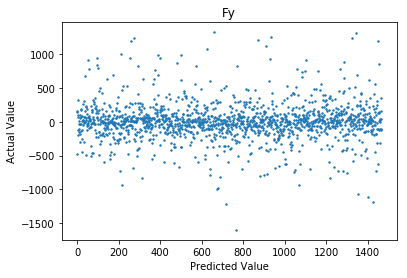

In [162]:
# plot residuals
nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii]- mpreds[:,ii], x = np.arange(len(Ytest[:,ii])), s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [161]:
# refref: next step -- neural network
#from sklearn import cross_validation
#from sklearn.neural_network import MLPRegressor

#model = MLPRegressor(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(150,)) 
#cross_validation.cross_val_score(model, X, Y, scoring='mean_squared_error')

array([], dtype=int64)